In [14]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#read data
data = pd.read_csv("50-Startups.csv")

data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,California,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


In [3]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Text(0, 0.5, 'Number of companies')

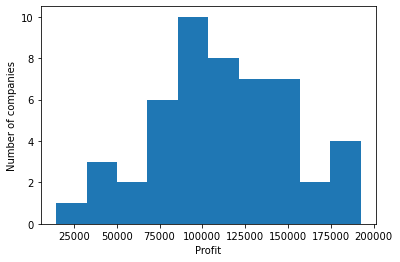

In [9]:
plt.hist(data['Profit'], bins=10)
plt.xlabel('Profit')
plt.ylabel('Number of companies')

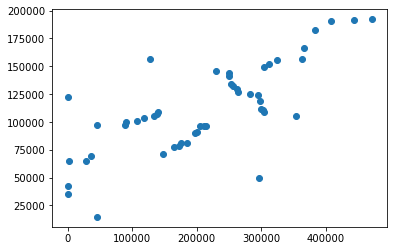

In [13]:
plt.scatter(x=data['Marketing Spend'], y=data['Profit'])

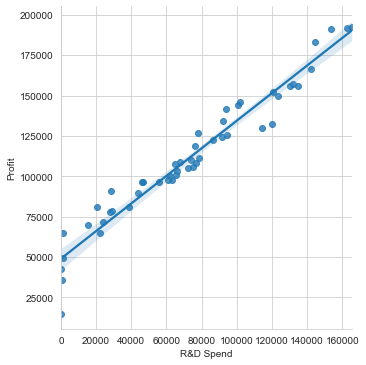

In [16]:
#auto linear regression using Seaborn
sns.lmplot(x='R&D Spend', y='Profit', data = data)

In [66]:
# Manually plot best fit line using numpy
# Using numpy for Univariate Linear Regression
X = data['R&D Spend']
X = np.vstack(data['R&D Spend']) # numpy's regression method needs 2D array with Values by # of Attributes
X.shape

(50, 1)

In [67]:
Y = data['Profit']

In [68]:
# Now we'll solve the linear regression equation y = mx + b for our Y
# To simplify for numpy, its y = Ap
# A = [x 1] 
# p = [m / b]

In [69]:
# Let's bring our A in [x 1] format
X = np.array( [ [value,float(1)] for value in X]) # list comprehension
X = X.astype(np.float64)

<ipython-input-69-a12f1ffaa9ee>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X = np.array( [ [value,float(1)] for value in X]) # list comprehension


In [70]:
# get m & b values for the best line
m, b = np.linalg.lstsq(X,Y,rcond=None)[0]

# m = 0.85429137093881
# b = 49032.899141252106

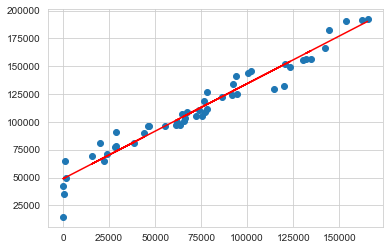

In [82]:
plt.plot(data['R&D Spend'], data['Profit'], 'o')

x = data['R&D Spend']

plt.plot(x, m*x + b, 'r', label='Best Fit Line')